<a href="https://colab.research.google.com/github/mzaoualim/Kaggle_LLM_20_Questions/blob/main/Quick_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Libraries

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'llm-20-questions:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F61247%2F8550470%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240531%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240531T052619Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80e2ee7a8051cf508bf0c6a1568b11ecfe39fe64ea43241018198a1261866c8f9dd9c3d94f2fc959bdde118fdc539975ec6053579fa0e6678d1be4424c2d96ea59ae8c5193b4c618ff2b71740a1893996908a6af614c82cf1d96dbb136ffd49bc40bb8fe394ebf0d4f7ec40c2f9b3f9ddd33743fb0e83bc26843c4e06894fb5ef343e80a5cd2f7a03bb1173af2797b102693b47996caa7ab9cd597581b224002665c67cb6bf70247a8c82761acbc01623b2559e6696634f8bd382f42ccf593b6c492b4848e3cabb5415d4e2f046870d19cef2215b57997236513558707b5f5a29d98594abffe9f72e5868e49f7277357fc70d7e839ed63198593c6828666d910'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 11166 bytes downloaded
Downloaded and uncompressed: llm-20-questions
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-20-questions/llm_20_questions/llm_20_questions.js
/kaggle/input/llm-20-questions/llm_20_questions/llm_20_questions.json
/kaggle/input/llm-20-questions/llm_20_questions/keywords.py
/kaggle/input/llm-20-questions/llm_20_questions/llm_20_questions.py


# keywords analysis

## LOADING KEYWORDS

In [3]:
f = open("/kaggle/input/llm-20-questions/llm_20_questions/keywords.py", "r")
print(f.read())

"""List of keywords for 20 Questions."""

KEYWORDS_JSON = """
[
  {
    "category": "country",
    "words": [
      {
        "keyword": "afghanistan",
        "alts": []
      },
      {
        "keyword": "albania",
        "alts": []
      },
      {
        "keyword": "algeria",
        "alts": []
      },
      {
        "keyword": "andorra",
        "alts": []
      },
      {
        "keyword": "angola",
        "alts": []
      },
      {
        "keyword": "antigua and barbuda",
        "alts": []
      },
      {
        "keyword": "argentina",
        "alts": []
      },
      {
        "keyword": "armenia",
        "alts": []
      },
      {
        "keyword": "australia",
        "alts": []
      },
      {
        "keyword": "austria",
        "alts": []
      },
      {
        "keyword": "azerbaijan",
        "alts": []
      },
      {
        "keyword": "bahrain",
        "alts": []
      },
      {
        "keyword": "bangladesh",
        "alts": []
      },
      {

In [4]:
import json

exec(open("/kaggle/input/llm-20-questions/llm_20_questions/keywords.py").read())
KEYWORDS_JSON = json.loads(KEYWORDS_JSON)
KEYWORDS_JSON

[{'category': 'country',
  'words': [{'keyword': 'afghanistan', 'alts': []},
   {'keyword': 'albania', 'alts': []},
   {'keyword': 'algeria', 'alts': []},
   {'keyword': 'andorra', 'alts': []},
   {'keyword': 'angola', 'alts': []},
   {'keyword': 'antigua and barbuda', 'alts': []},
   {'keyword': 'argentina', 'alts': []},
   {'keyword': 'armenia', 'alts': []},
   {'keyword': 'australia', 'alts': []},
   {'keyword': 'austria', 'alts': []},
   {'keyword': 'azerbaijan', 'alts': []},
   {'keyword': 'bahrain', 'alts': []},
   {'keyword': 'bangladesh', 'alts': []},
   {'keyword': 'barbados', 'alts': []},
   {'keyword': 'belarus', 'alts': []},
   {'keyword': 'belgium', 'alts': []},
   {'keyword': 'belize', 'alts': []},
   {'keyword': 'benin', 'alts': []},
   {'keyword': 'bhutan', 'alts': []},
   {'keyword': 'bolivia', 'alts': []},
   {'keyword': 'bosnia and herzegovina', 'alts': []},
   {'keyword': 'botswana', 'alts': []},
   {'keyword': 'brazil', 'alts': []},
   {'keyword': 'brunei', 'alts':

In [5]:
# sum of each keywords by category

print(len(KEYWORDS_JSON))
for category in KEYWORDS_JSON:
    print(category["category"], len(category["words"]))

3
country 190
city 324
landmark 49


## PROCESSING JSON KEYWORDS

In [9]:
# from json to dataframe

country = pd.json_normalize(KEYWORDS_JSON[0]['words'])
city = pd.json_normalize(KEYWORDS_JSON[1]['words'])
landmark = pd.json_normalize(KEYWORDS_JSON[2]['words'])

In [10]:
country

,keyword,alts
0,afghanistan,[]
1,albania,[]
2,algeria,[]
3,andorra,[]
4,angola,[]
...,...,...
185,venezuela,[]
186,vietnam,[]
187,yemen,[]
188,zambia,[]


In [11]:
city

,keyword,alts
0,amsterdam netherlands,"[amsterdam, amsterdam holland]"
1,anaheim california,"[anaheim, anaheim ca, anaheim usa]"
2,austin texas,"[austin, austin tx, austin usa]"
3,auckland new zealand,"[auckland, auckland nz]"
4,asheville north carolina,"[asheville, asheville nc, asheville usa]"
...,...,...
319,zeeland netherlands,[zeeland]
320,zhongshan china,[zhongshan]
321,zanzibar tanzania,[zanzibar]
322,zurich switzerland,[zurich]


In [12]:
landmark

,keyword,alts
0,denali,"[mount mckinley, mt mckinley]"
1,mount saint lias,[mt st elias]
2,mount whitney,[mt whitney]
3,mount rainier,[mt rainier]
4,iztaccihuatl,[]
5,grand teton,[]
6,gannett peak,[]
7,mount adams,[mt adams]
8,mount saint helens,[mt st helens]
9,mount shasta,[mt shasta]


In [23]:
# looking for missing and duplicated keywords
print('sum of missing data:\n',
      'country: ',country['keyword'].isna().sum(), '\n',
      'city: ',city['keyword'].isna().sum(), '\n',
      'landmark: ',landmark['keyword'].isna().sum(), '\n'
      )

print('sum of duplicated data:\n',
      'country: ',country['keyword'].duplicated().sum(), '\n',
      'city: ',city['keyword'].duplicated().sum(), '\n',
      'landmark: ',landmark['keyword'].duplicated().sum(), '\n'
      )

sum of missing data:
 country:  0 
 city:  0 
 landmark:  0 

sum of duplicated data:
 country:  0 
 city:  10 
 landmark:  1 



In [38]:
# investigating duplicated data
## landmark dataset
landmark['keyword'].value_counts()

keyword
mount saint helens    2
denali                1
amazon                1
nanga parbat          1
kangchenjunga         1
mount fuji            1
kilimanjaro           1
meru                  1
aoraki                1
haleakala             1
puncak jaya           1
sumantri              1
colorado river        1
annapurna             1
dnieper               1
ganges                1
illinois river        1
mississippi river     1
nile                  1
rhine                 1
yangtze river         1
yellow river          1
zambezi river         1
dhaulagiri            1
manaslu               1
mount saint lias      1
fitz roy              1
mount whitney         1
mount rainier         1
iztaccihuatl          1
grand teton           1
gannett peak          1
mount adams           1
mount shasta          1
pikes peak            1
aconcagua             1
cotopaxi              1
cho oyu               1
chimborazo            1
mont blanc            1
zugspitze             1
mount el

In [39]:
landmark[landmark['keyword'] == 'mount saint helens']

,keyword,alts
8,mount saint helens,[mt st helens]
10,mount saint helens,[mt st helens]


In [43]:
# eliminate duplicated rows

## landmark dataset
landmark.drop_duplicates(subset='keyword', keep="last", inplace=True)
landmark['keyword'].duplicated().sum()

0

In [63]:
# eliminate duplicated data
## city dataset

city['keyword'].duplicated().sum()
city.drop_duplicates(subset='keyword', keep="last", inplace=True)
city['keyword'].duplicated().sum()

0

## ALTS Analysis

In [ ]:
# alts analysis
## countries, cities, landmarks with multiples alts

### city

In [66]:
# cities with most alts
city

,keyword,alts
0,amsterdam netherlands,"[amsterdam, amsterdam holland]"
1,anaheim california,"[anaheim, anaheim ca, anaheim usa]"
2,austin texas,"[austin, austin tx, austin usa]"
3,auckland new zealand,"[auckland, auckland nz]"
4,asheville north carolina,"[asheville, asheville nc, asheville usa]"
...,...,...
319,zeeland netherlands,[zeeland]
320,zhongshan china,[zhongshan]
321,zanzibar tanzania,[zanzibar]
322,zurich switzerland,[zurich]


In [219]:
# generate a dictionnary with {city:length of corresponding label(s)}
city_alts_dict = dict()
for i in range(len(city)):
  city_alts_dict[city.iloc[i, 0]] = len(str(city.iloc[i, 1]).strip('[]').split(','))

In [151]:
city_alts_dict

{'amsterdam netherlands': 2,
 'anaheim california': 3,
 'austin texas': 3,
 'auckland new zealand': 2,
 'asheville north carolina': 3,
 'ashgabat turkmenistan': 2,
 'athens greece': 1,
 'athens georgia': 3,
 'atlanta georgia': 3,
 'antwerp belgium': 1,
 'adelaide australia': 1,
 'astana kazakhstan': 1,
 'asuncion paraguay': 1,
 'algiers algeria': 1,
 'acapulco mexico': 1,
 'ankara turkey': 1,
 'baghdad iraq': 1,
 'bangkok thailand': 1,
 'beijing china': 2,
 'berlin germany': 1,
 'boston massachusetts': 3,
 'buenos aires argentina': 1,
 'bursa turkey': 1,
 'bucharest romania': 1,
 'baltimore maryland': 3,
 'beirut lebanon': 1,
 'belfast northern ireland': 3,
 'bratislava slovakia': 1,
 'belgrade serbia': 1,
 'budapest hungary': 1,
 'baku azerbaijan': 1,
 'bordeaux france': 1,
 'busan south korea': 1,
 'brussels belgium': 1,
 'bangalore india': 1,
 'calgary canada': 1,
 'chicago illinois': 2,
 'copenhagen denmark': 1,
 'columbus ohio': 1,
 'cologne germany': 1,
 'cairo egypt': 1,
 'cape 

In [153]:
# form dictionnary to pandas dataframe
city_alts_df = pd.DataFrame.from_dict(city_alts_dict, orient='index', columns=['len_alts'])
city_alts_df.reset_index(inplace=True)

In [158]:
city_alts_df.rename(columns={'index':'city_labels'}, inplace=True)

In [159]:
city_alts_df

,city_labels,len_alts
0,amsterdam netherlands,2
1,anaheim california,3
2,austin texas,3
3,auckland new zealand,2
4,asheville north carolina,3
...,...,...
309,zeeland netherlands,1
310,zhongshan china,1
311,zanzibar tanzania,1
312,zurich switzerland,1


In [213]:
# grouping cities by numbers of labels
grouped_city_alts_df = city_alts_df.groupby('len_alts').count()
grouped_city_alts_df

,city_labels
len_alts,
1,278
2,14
3,21
7,1


array([<Axes: >], dtype=object)

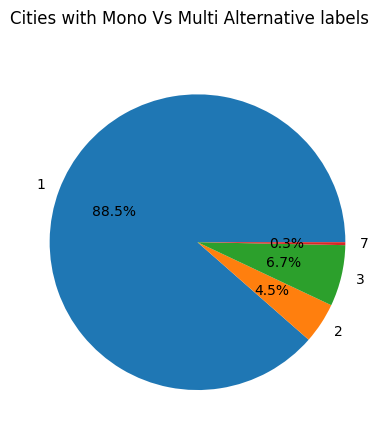

In [217]:
# ploting the distribution of cities by number of alternative labels
grouped_city_alts_df.plot(
    kind='pie',
    title='Cities with Mono Vs Multi Alternative labels',
    ylabel='',
    legend=False,
    subplots=True,
    autopct='%1.1f%%'
    )

More than 88% (278 city) of listed cities have a unique label, and one city (Los Angeles) is represented in seven (7) alternatives labels.

### country

In [218]:
# cities with most alts
country

,keyword,alts
0,afghanistan,[]
1,albania,[]
2,algeria,[]
3,andorra,[]
4,angola,[]
...,...,...
185,venezuela,[]
186,vietnam,[]
187,yemen,[]
188,zambia,[]


In [229]:
# generate a dictionnary with {country:length of corresponding label(s)}
country_alts_dict = dict()
for i in range(len(country)):
  country_alts_dict[country.iloc[i, 0]] = len(str(country.iloc[i, 1]).strip('[]').split(','))

country_alts_dict

{'afghanistan': 1,
 'albania': 1,
 'algeria': 1,
 'andorra': 1,
 'angola': 1,
 'antigua and barbuda': 1,
 'argentina': 1,
 'armenia': 1,
 'australia': 1,
 'austria': 1,
 'azerbaijan': 1,
 'bahrain': 1,
 'bangladesh': 1,
 'barbados': 1,
 'belarus': 1,
 'belgium': 1,
 'belize': 1,
 'benin': 1,
 'bhutan': 1,
 'bolivia': 1,
 'bosnia and herzegovina': 1,
 'botswana': 1,
 'brazil': 1,
 'brunei': 1,
 'bulgaria': 1,
 'burkina faso': 1,
 'burundi': 1,
 'cambodia': 1,
 'cameroon': 1,
 'canada': 1,
 'cape verde': 1,
 'central african republic': 1,
 'chad': 1,
 'chile': 1,
 'china': 1,
 'colombia': 1,
 'comoros': 1,
 'congo': 3,
 'costa rica': 1,
 'croatia': 1,
 'cuba': 1,
 'cyprus': 1,
 'czech republic': 1,
 'democratic republic of the congo': 2,
 'denmark': 1,
 'djibouti': 1,
 'dominica': 1,
 'dominican republic': 1,
 'ecuador': 1,
 'egypt': 1,
 'el salvador': 1,
 'england': 1,
 'equatorial guinea': 1,
 'eritrea': 1,
 'estonia': 1,
 'ethiopia': 1,
 'federated states of micronesia': 1,
 'finland'

In [221]:
max(country_alts_dict.values())

3

In [230]:
# form dictionnary to pandas dataframe
country_alts_df = pd.DataFrame.from_dict(country_alts_dict, orient='index', columns=['len_alts'])
country_alts_df.reset_index(inplace=True)
country_alts_df.rename(columns={'index':'city_labels'}, inplace=True)

In [231]:
# grouping countries by numbers of labels
grouped_country_alts_df = country_alts_df.groupby('len_alts').count()
grouped_country_alts_df

,city_labels
len_alts,
1,185
2,3
3,2


array([<Axes: >], dtype=object)

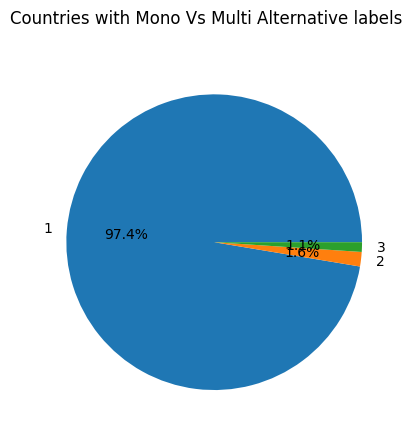

In [224]:
# ploting the distribution of cities by number of alternative labels
grouped_country_alts_df.plot(
    kind='pie',
    title='Countries with Mono Vs Multi Alternative labels',
    ylabel='',
    legend=False,
    subplots=True,
    autopct='%1.1f%%'
    )

Also, we have 97% (195) of country is represented with a unique labels, 3 with two labels and 2 with 2 labels.

### landmark

In [225]:
# landmarks with most alts
landmark

,keyword,alts
0,denali,"[mount mckinley, mt mckinley]"
1,mount saint lias,[mt st elias]
2,mount whitney,[mt whitney]
3,mount rainier,[mt rainier]
4,iztaccihuatl,[]
5,grand teton,[]
6,gannett peak,[]
7,mount adams,[mt adams]
9,mount shasta,[mt shasta]
10,mount saint helens,[mt st helens]


In [226]:
# generate a dictionnary with {landmark:length of corresponding label(s)}
landmark_alts_dict = dict()
for i in range(len(landmark)):
  landmark_alts_dict[landmark.iloc[i, 0]] = len(str(landmark.iloc[i, 1]).strip('[]').split(','))

landmark_alts_dict

{'denali': 2,
 'mount saint lias': 1,
 'mount whitney': 1,
 'mount rainier': 1,
 'iztaccihuatl': 1,
 'grand teton': 1,
 'gannett peak': 1,
 'mount adams': 1,
 'mount shasta': 1,
 'mount saint helens': 1,
 'pikes peak': 1,
 'aconcagua': 1,
 'fitz roy': 1,
 'cotopaxi': 1,
 'chimborazo': 1,
 'mont blanc': 1,
 'zugspitze': 1,
 'mount elbrus': 1,
 'mount etna': 1,
 'everest': 2,
 'k2': 1,
 'lhotse': 1,
 'makalu': 1,
 'cho oyu': 1,
 'manaslu': 1,
 'annapurna': 1,
 'dhaulagiri': 1,
 'nanga parbat': 1,
 'kangchenjunga': 1,
 'mount fuji': 2,
 'kilimanjaro': 2,
 'meru': 2,
 'aoraki': 2,
 'haleakala': 1,
 'puncak jaya': 1,
 'sumantri': 1,
 'amazon': 1,
 'colorado river': 1,
 'dnieper': 1,
 'ganges': 2,
 'illinois river': 1,
 'mississippi river': 1,
 'nile': 1,
 'rhine': 1,
 'yangtze river': 2,
 'yellow river': 1,
 'zambezi river': 1,
 'yenisei river': 1}

In [233]:
max(landmark_alts_dict.values())

2

In [234]:
# form dictionnary to pandas dataframe
landmark_alts_df = pd.DataFrame.from_dict(landmark_alts_dict, orient='index', columns=['len_alts'])
landmark_alts_df.reset_index(inplace=True)
landmark_alts_df.rename(columns={'index':'landmark_labels'}, inplace=True)

In [235]:
# grouping countries by numbers of labels
grouped_landmark_alts_df = landmark_alts_df.groupby('len_alts').count()
grouped_landmark_alts_df

,landmark_labels
len_alts,
1,40
2,8


array([<Axes: >], dtype=object)

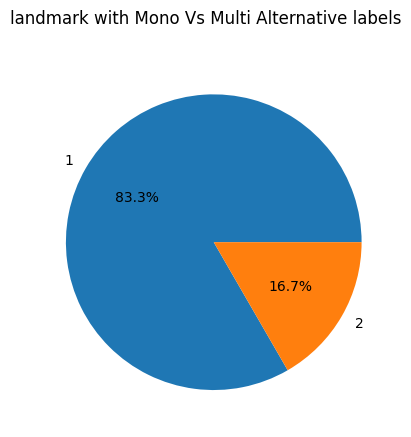

In [237]:
# ploting the distribution of cities by number of alternative labels
grouped_landmark_alts_df.plot(
    kind='pie',
    title='landmark with Mono Vs Multi Alternative labels',
    ylabel='',
    legend=False,
    subplots=True,
    autopct='%1.1f%%'
    )

Again, most of landmarks (83% or 40) are represented in unique labels versus 16% (8) have dual additionnal labels.

## GIS Analysis

In [ ]:
# GIS analysis
## continent representations
## countries with multiple cities
## countries/cities with multiple landmarks

### Countries by Continent representation

In [296]:
#loading list of countries
country_by_continent = pd.read_html('https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent')[4].copy()

In [297]:
country_by_continent= country_by_continent[['Country', 'Continent']]

<Axes: title={'center': 'World countries by continent'}, ylabel='count'>

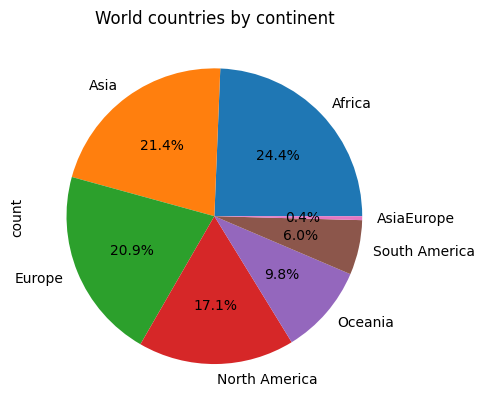

In [318]:
# countries by continent
country_by_continent.Continent.value_counts().plot(
    kind='pie',
    title='World countries by continent',
    autopct='%1.1f%%')

In [305]:
country_by_continent['Country'] = country_by_continent.Country.str.lower()

In [306]:
country_by_continent

,Country,Continent
0,russia,AsiaEurope
1,algeria,Africa
2,angola,Africa
3,benin,Africa
4,botswana,Africa
...,...,...
229,paraguay,South America
230,peru,South America
231,suriname,South America
232,uruguay,South America


In [313]:
country_by_continent.Continent.value_counts()

Continent
Africa           0.243590
Asia             0.213675
Europe           0.209402
North America    0.170940
Oceania          0.098291
South America    0.059829
AsiaEurope       0.004274
Name: proportion, dtype: float64

In [308]:
country_by_continent.Country.duplicated().sum()

0

In [315]:
country.merge(
    country_by_continent,
    how='left',
    left_on='keyword',
    right_on='Country')['Continent'].value_counts() #.plot(kind='pie')

Continent
Africa           49
Asia             46
Europe           42
North America    21
South America    12
Oceania          12
AsiaEurope        1
Name: count, dtype: int64

<Axes: title={'center': 'Countries by continent'}>

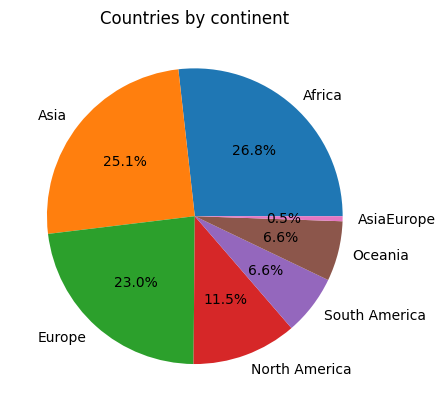

In [320]:
country.merge(
    country_by_continent,
    how='left',
    left_on='keyword',
    right_on='Country')['Continent'].value_counts().plot(kind='pie',
                                                         title= 'Countries by continent',
                                                         xlabel='',
                                                         ylabel='',
                                                         autopct='%1.1f%%')

We have a fair representation of each continent in the keyword dataset.

# Ressources

[LLM 20 Questions - Keywords](https://www.kaggle.com/code/docxian/llm-20-questions-keywords/notebook)

[[LLM 20 Questions] EDA Map keywords](https://www.kaggle.com/code/waechter/llm-20-questions-eda-map-keywords)